In [18]:
!pip install rdflib networkx matplotlib

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/wikidataintegrator-0.9.30-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [22]:
!pip install ontospy

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/wikidataintegrator-0.9.30-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 818.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:0000:0100:01


In [6]:
import re

def sanitize_rdf_node_id(rdf_content):
    # Regex pattern to find invalid rdf:nodeID
    pattern = re.compile(r'rdf:nodeID="(\d[^"]*)"')
    sanitized_content = re.sub(pattern, lambda x: f'rdf:nodeID="_{x.group(1)}"', rdf_content)
    return sanitized_content

# Read the RDF file
rdf_file_path = "/Users/ismail.ahouari/Downloads/Q618.rdf"
with open(rdf_file_path, 'r') as file:
    rdf_content = file.read()

# Sanitize the content
sanitized_rdf_content = sanitize_rdf_node_id(rdf_content)

# Write the sanitized content back to a new file
sanitized_rdf_file_path = "/Users/ismail.ahouari/Downloads/Q618_sanitized.rdf"
with open(sanitized_rdf_file_path, 'w') as file:
    file.write(sanitized_rdf_content)

print("Sanitization complete. Saved the sanitized RDF file.")

Sanitization complete. Saved the sanitized RDF file.


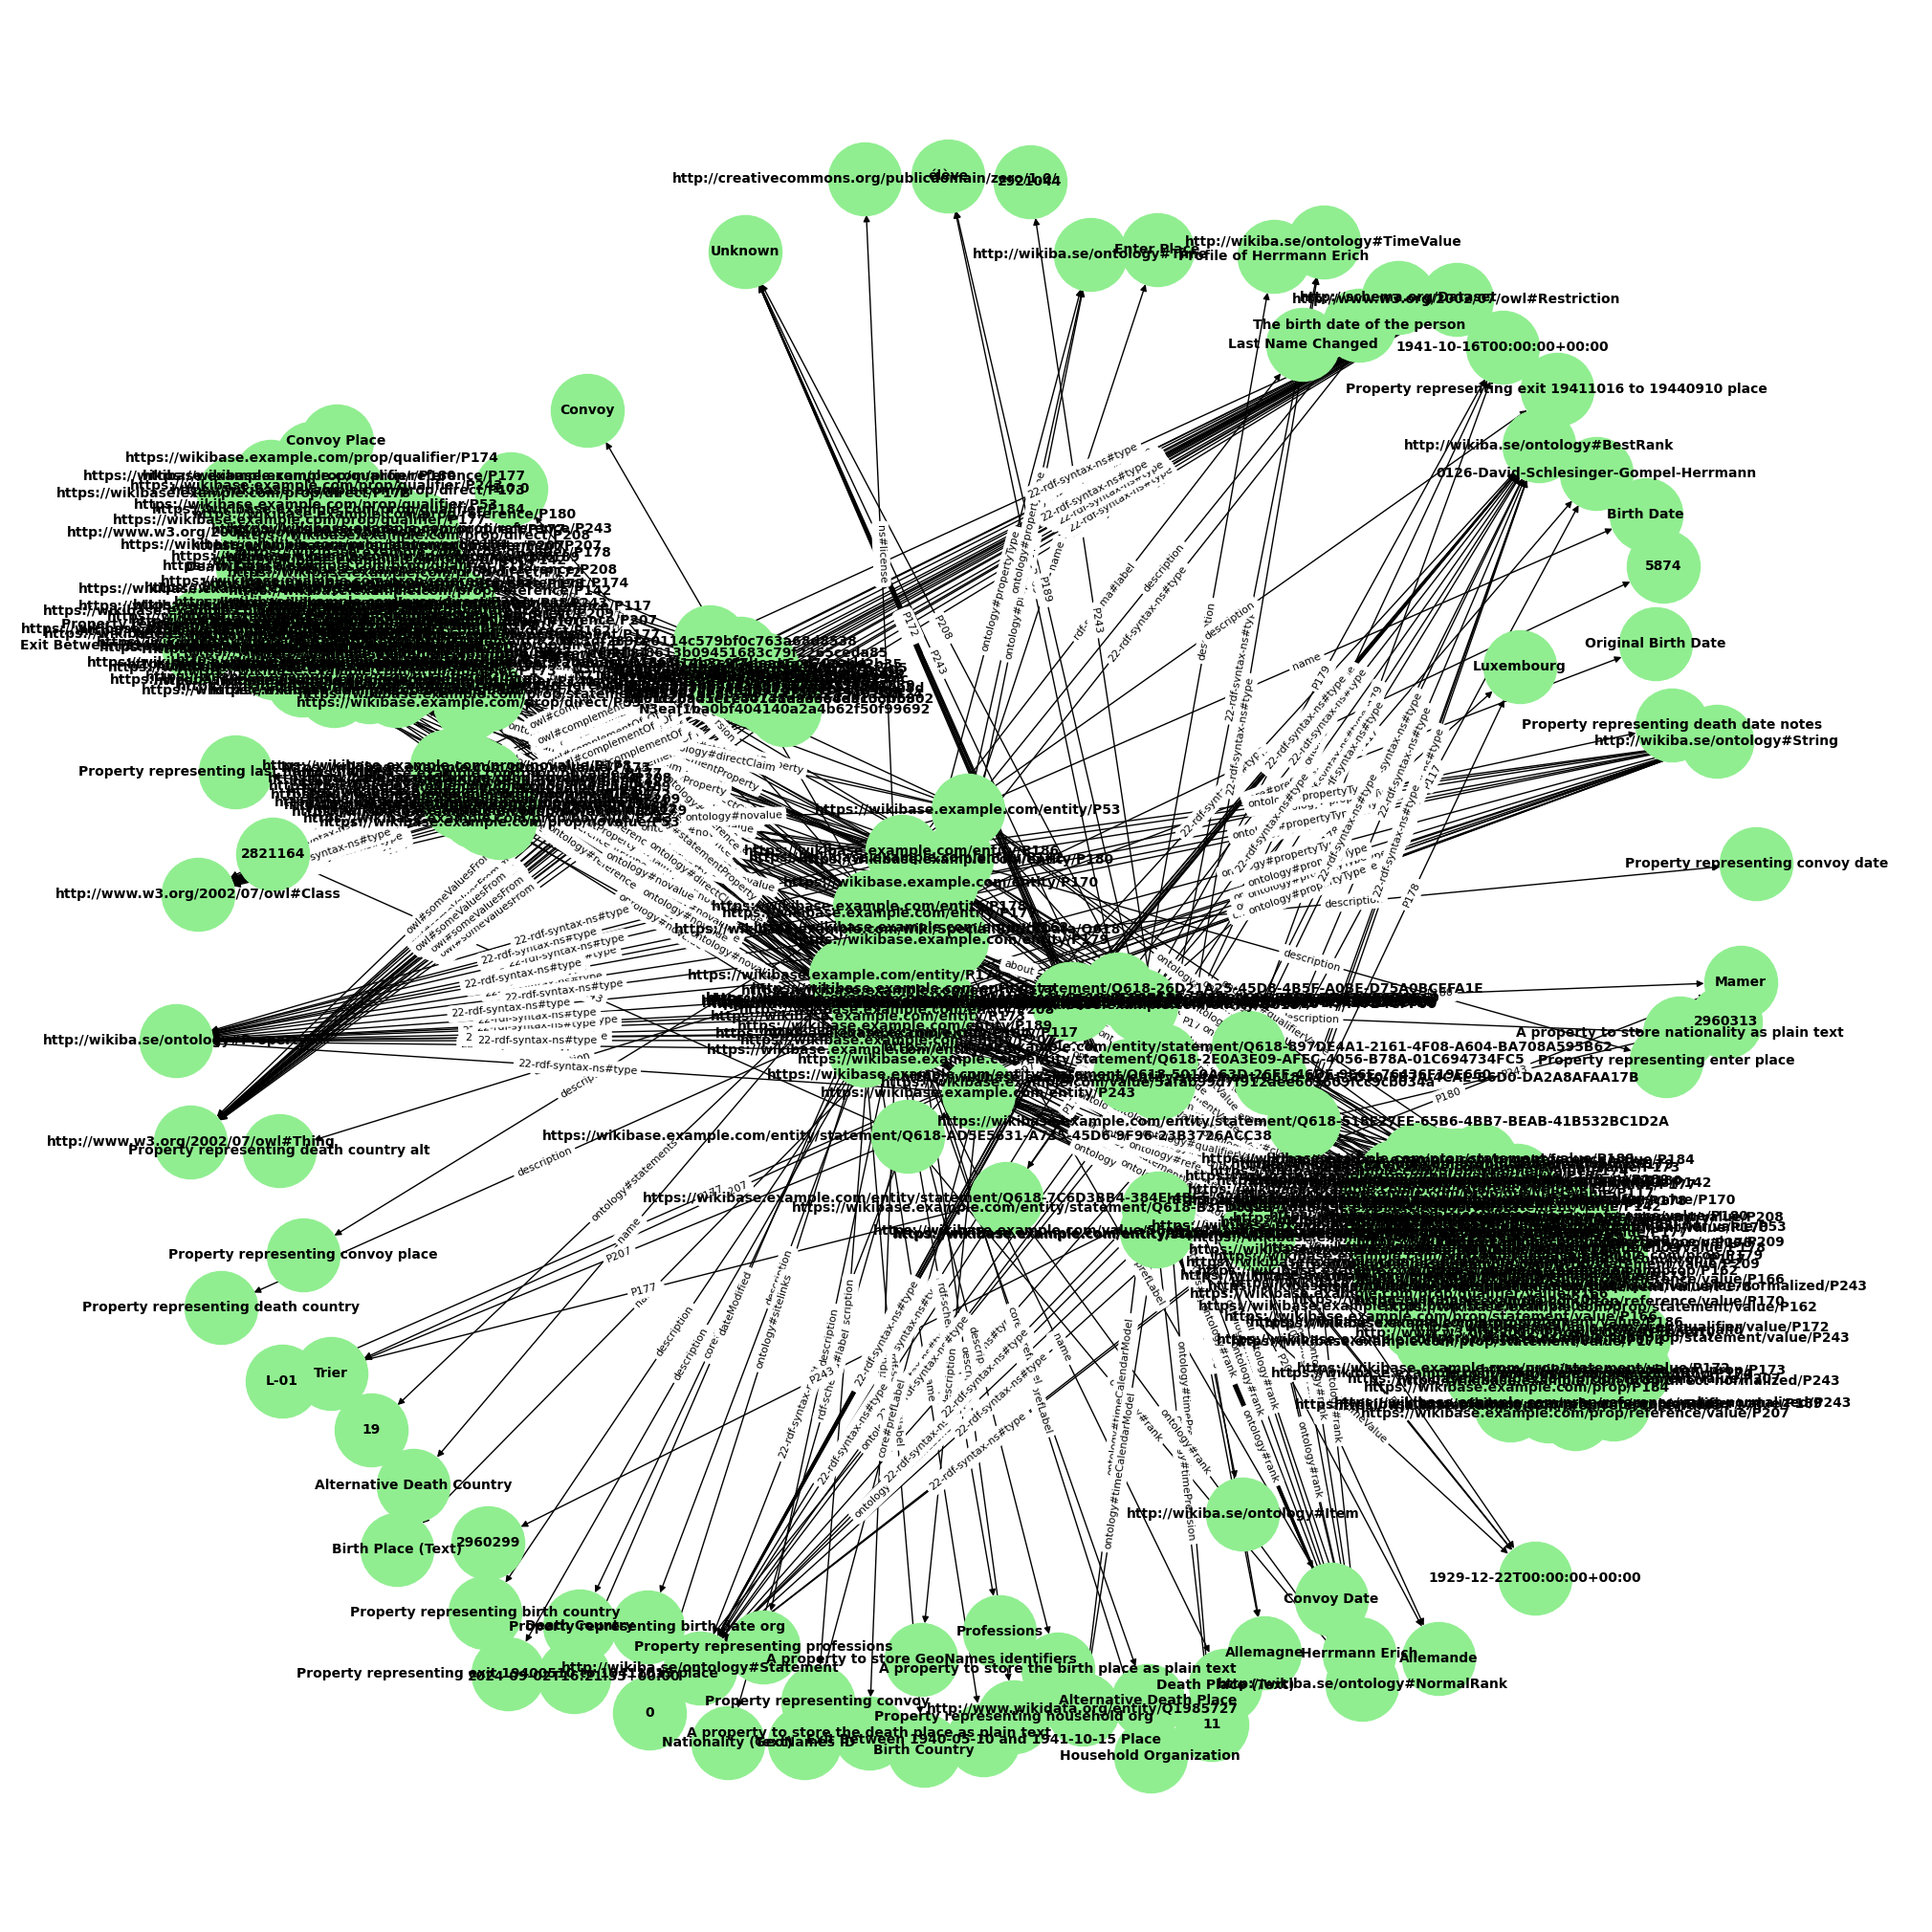

In [7]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt

# Load the sanitized RDF data into an rdflib Graph
g = rdflib.Graph()
g.parse(sanitized_rdf_file_path)

# Create a NetworkX DiGraph focusing only on subjects, predicates (properties), and objects
nx_graph = nx.DiGraph()

for subj, pred, obj in g:
    # Convert to strings for easier manipulation and visualization
    subj_str = str(subj)
    pred_str = str(pred).split('/')[-1]  # Simplify the predicate URI
    obj_str = str(obj)
    
    # Add the subject, predicate, and object to the graph
    nx_graph.add_edge(subj_str, obj_str, label=pred_str)

# Draw the graph using matplotlib and networkx
plt.figure(figsize=(20, 20))  # Adjust the figure size for a larger layout
pos = nx.spring_layout(nx_graph, k=0.1, iterations=50)  # Adjust the layout for better spacing
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)}, font_size=8)

plt.show()

In [10]:
print(obj_str)

https://wikibase.example.com/prop/statement/value/P142


Including these properties: {'owl#complementOf', 'ontology#directClaim', 'ontology#rank', 'P243', 'description', 'ontology#statementValue', 'ontology#reference', 'ontology#novalue', 'ontology#referenceValue', 'ontology#qualifier', 'ontology#claim', '22-rdf-syntax-ns#type', 'core#prefLabel', 'ontology#qualifierValue', 'owl#onProperty', 'name', 'rdf-schema#label', 'ontology#propertyType', 'ontology#statementProperty', 'owl#someValuesFrom'}


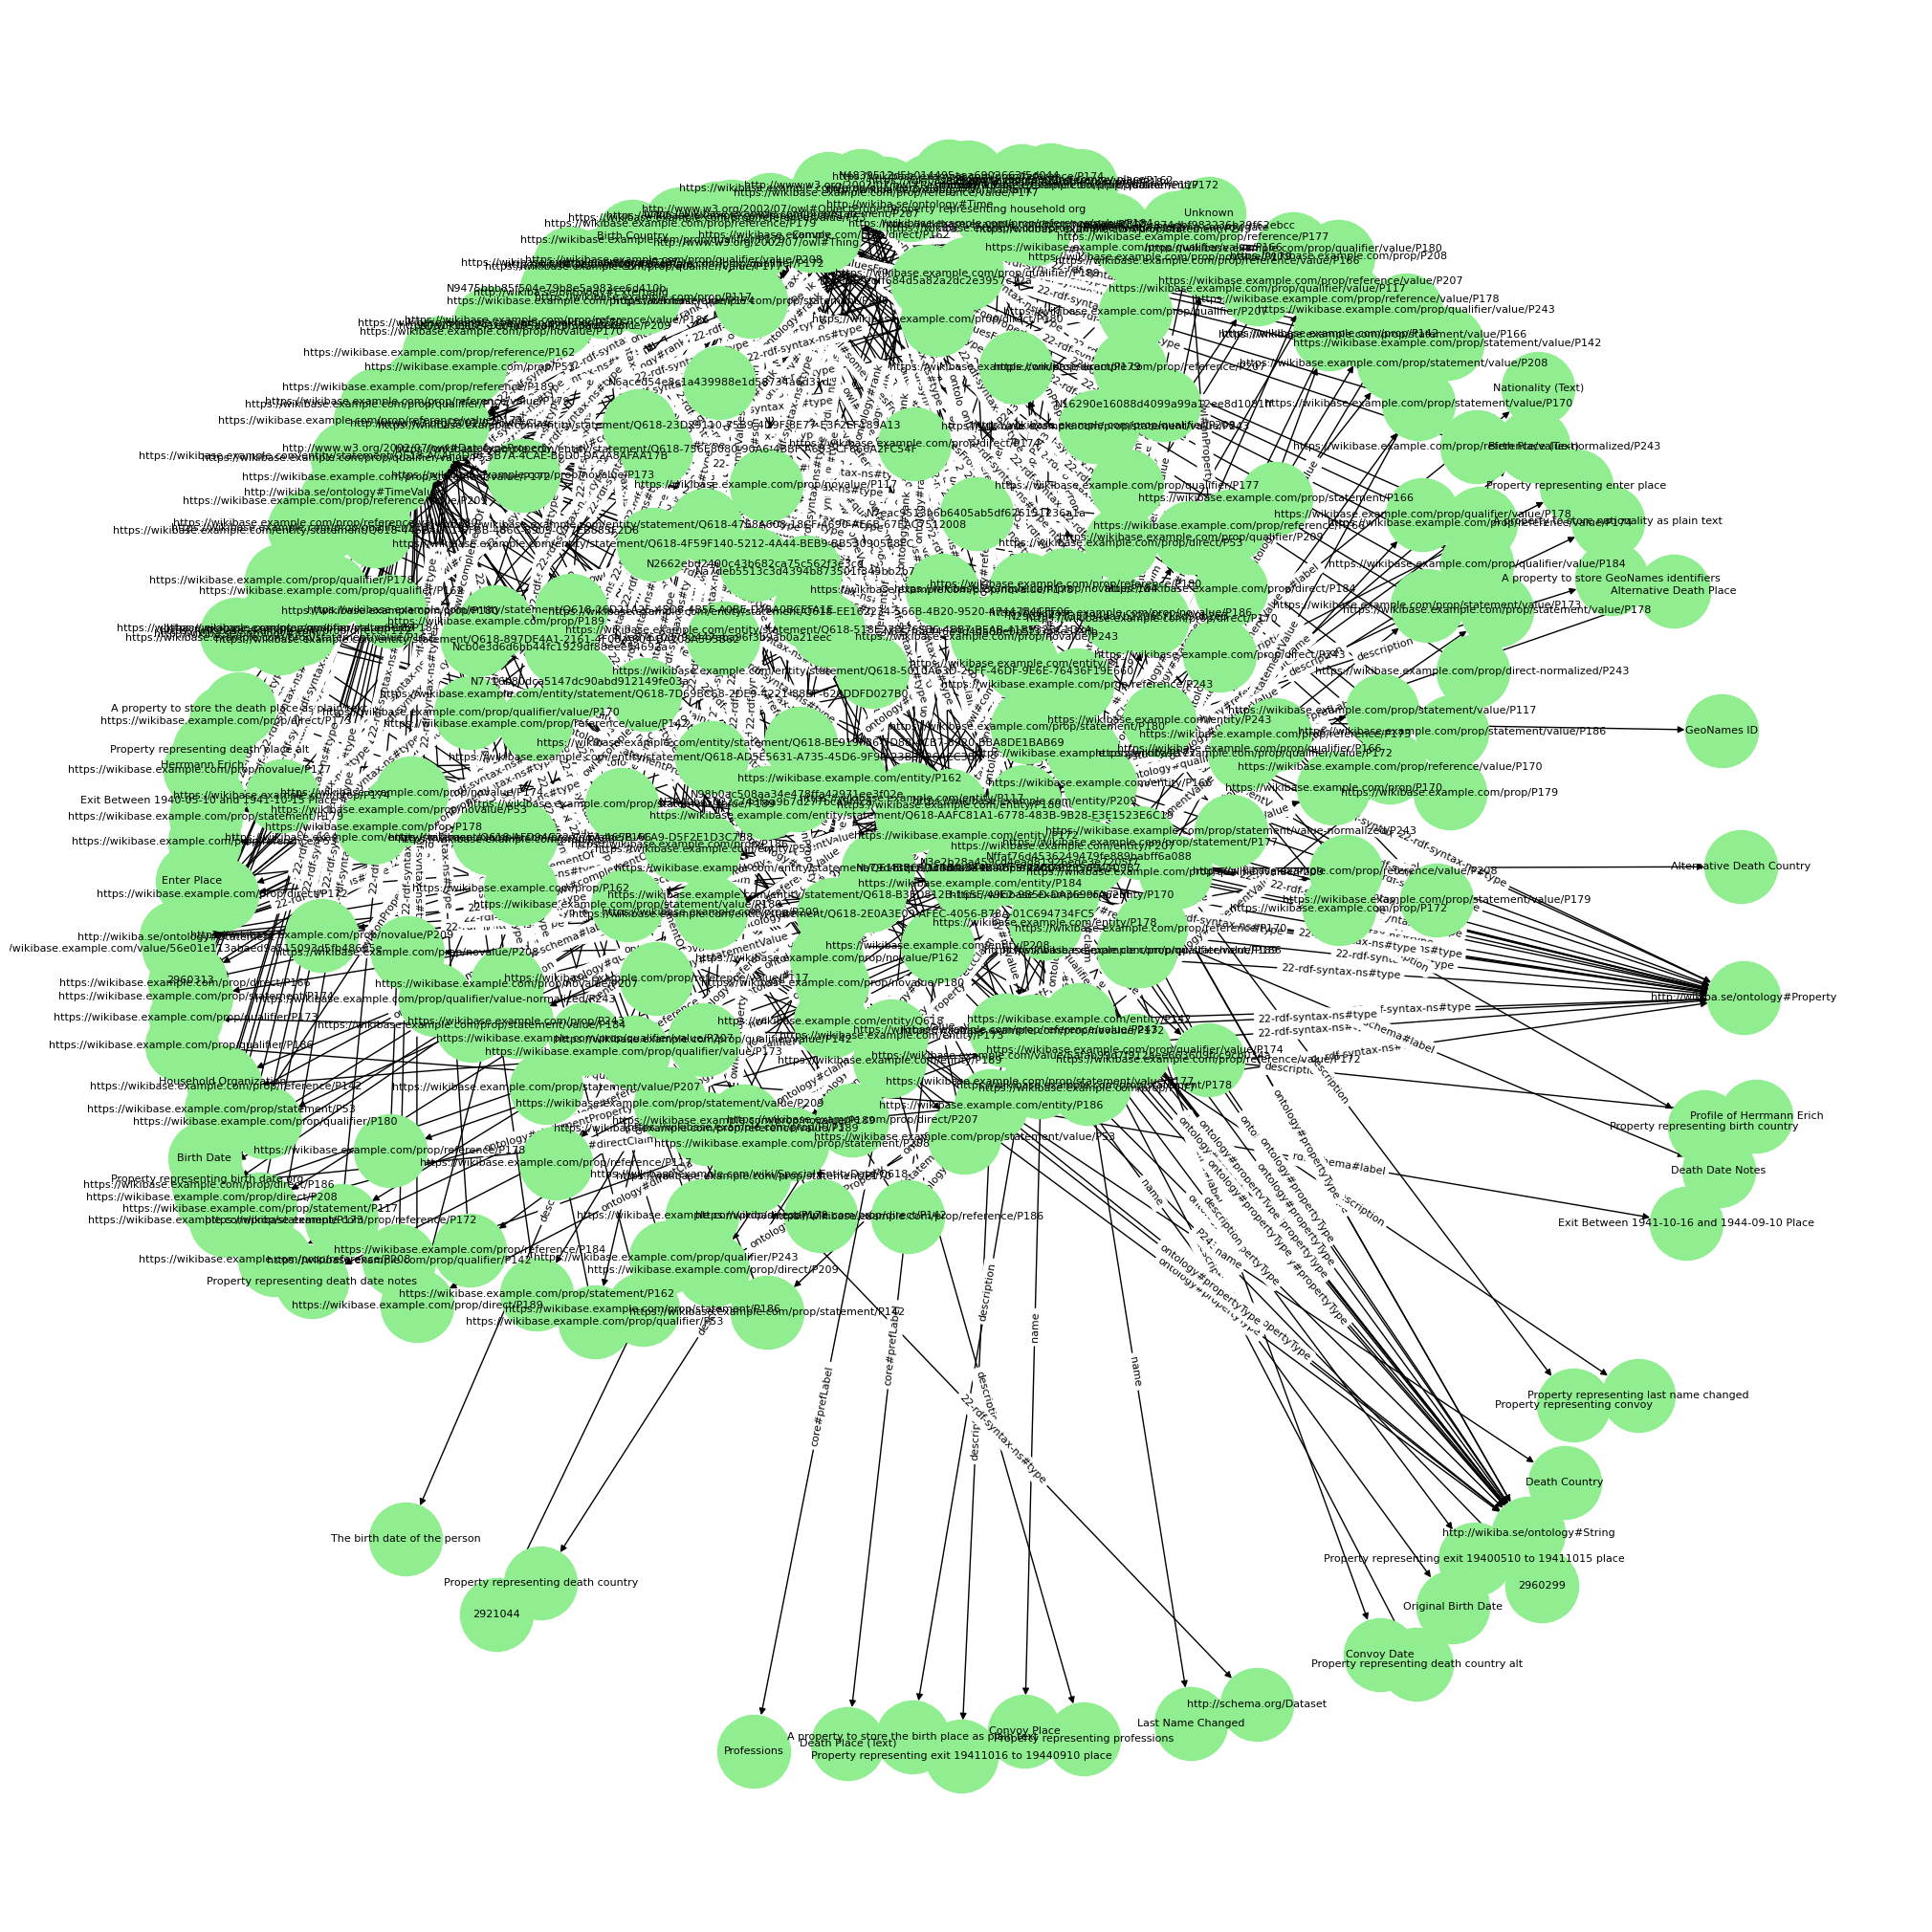

In [3]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

sanitized_rdf_file_path = "/Users/ismail.ahouari/Downloads/Q618_sanitized.rdf"
# Load the sanitized RDF data into an rdflib Graph
sanitized_rdf_file_path = "/Users/ismail.ahouari/Downloads/Q205_sanitized.rdf"  # Replace with your actual file path
g = rdflib.Graph()
g.parse(sanitized_rdf_file_path)

# Create a NetworkX DiGraph focusing only on subjects, predicates (properties), and objects
nx_graph = nx.DiGraph()

# Identify the target entity
entity_uri = "https://wikibase.example.com/wiki/Special:EntityData/Q205"  # Replace with your entity URI

# Count the frequency of each property (predicate) in the graph
property_counter = Counter(str(pred).split('/')[-1] for subj, pred, obj in g)

# Determine the top N most frequent properties
top_n_properties = {item[0] for item in property_counter.most_common(20)}  # Adjust N as needed

# Include properties directly connected to the entity
connected_properties = {str(pred).split('/')[-1] for subj, pred, obj in g if str(subj) == entity_uri or str(obj) == entity_uri}

# Combine the two sets to get the final list of properties to include
filtered_predicates = top_n_properties.union(connected_properties)

print(f"Including these properties: {filtered_predicates}")

# Add edges to the graph for the selected predicates
for subj, pred, obj in g:
    pred_str = str(pred).split('/')[-1]  # Simplify the predicate URI
    if pred_str in filtered_predicates:  # Filter by selected predicates
        subj_str = str(subj)
        obj_str = str(obj)
        nx_graph.add_edge(subj_str, obj_str, label=pred_str)

# Increase node spacing by adjusting the 'k' parameter in the spring layout
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(nx_graph, k=0.8, iterations=100)  # Increase k for more spacing
nx.draw(nx_graph, pos, with_labels=False, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_labels(nx_graph, pos, font_size=8)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)}, font_size=8)

plt.show()

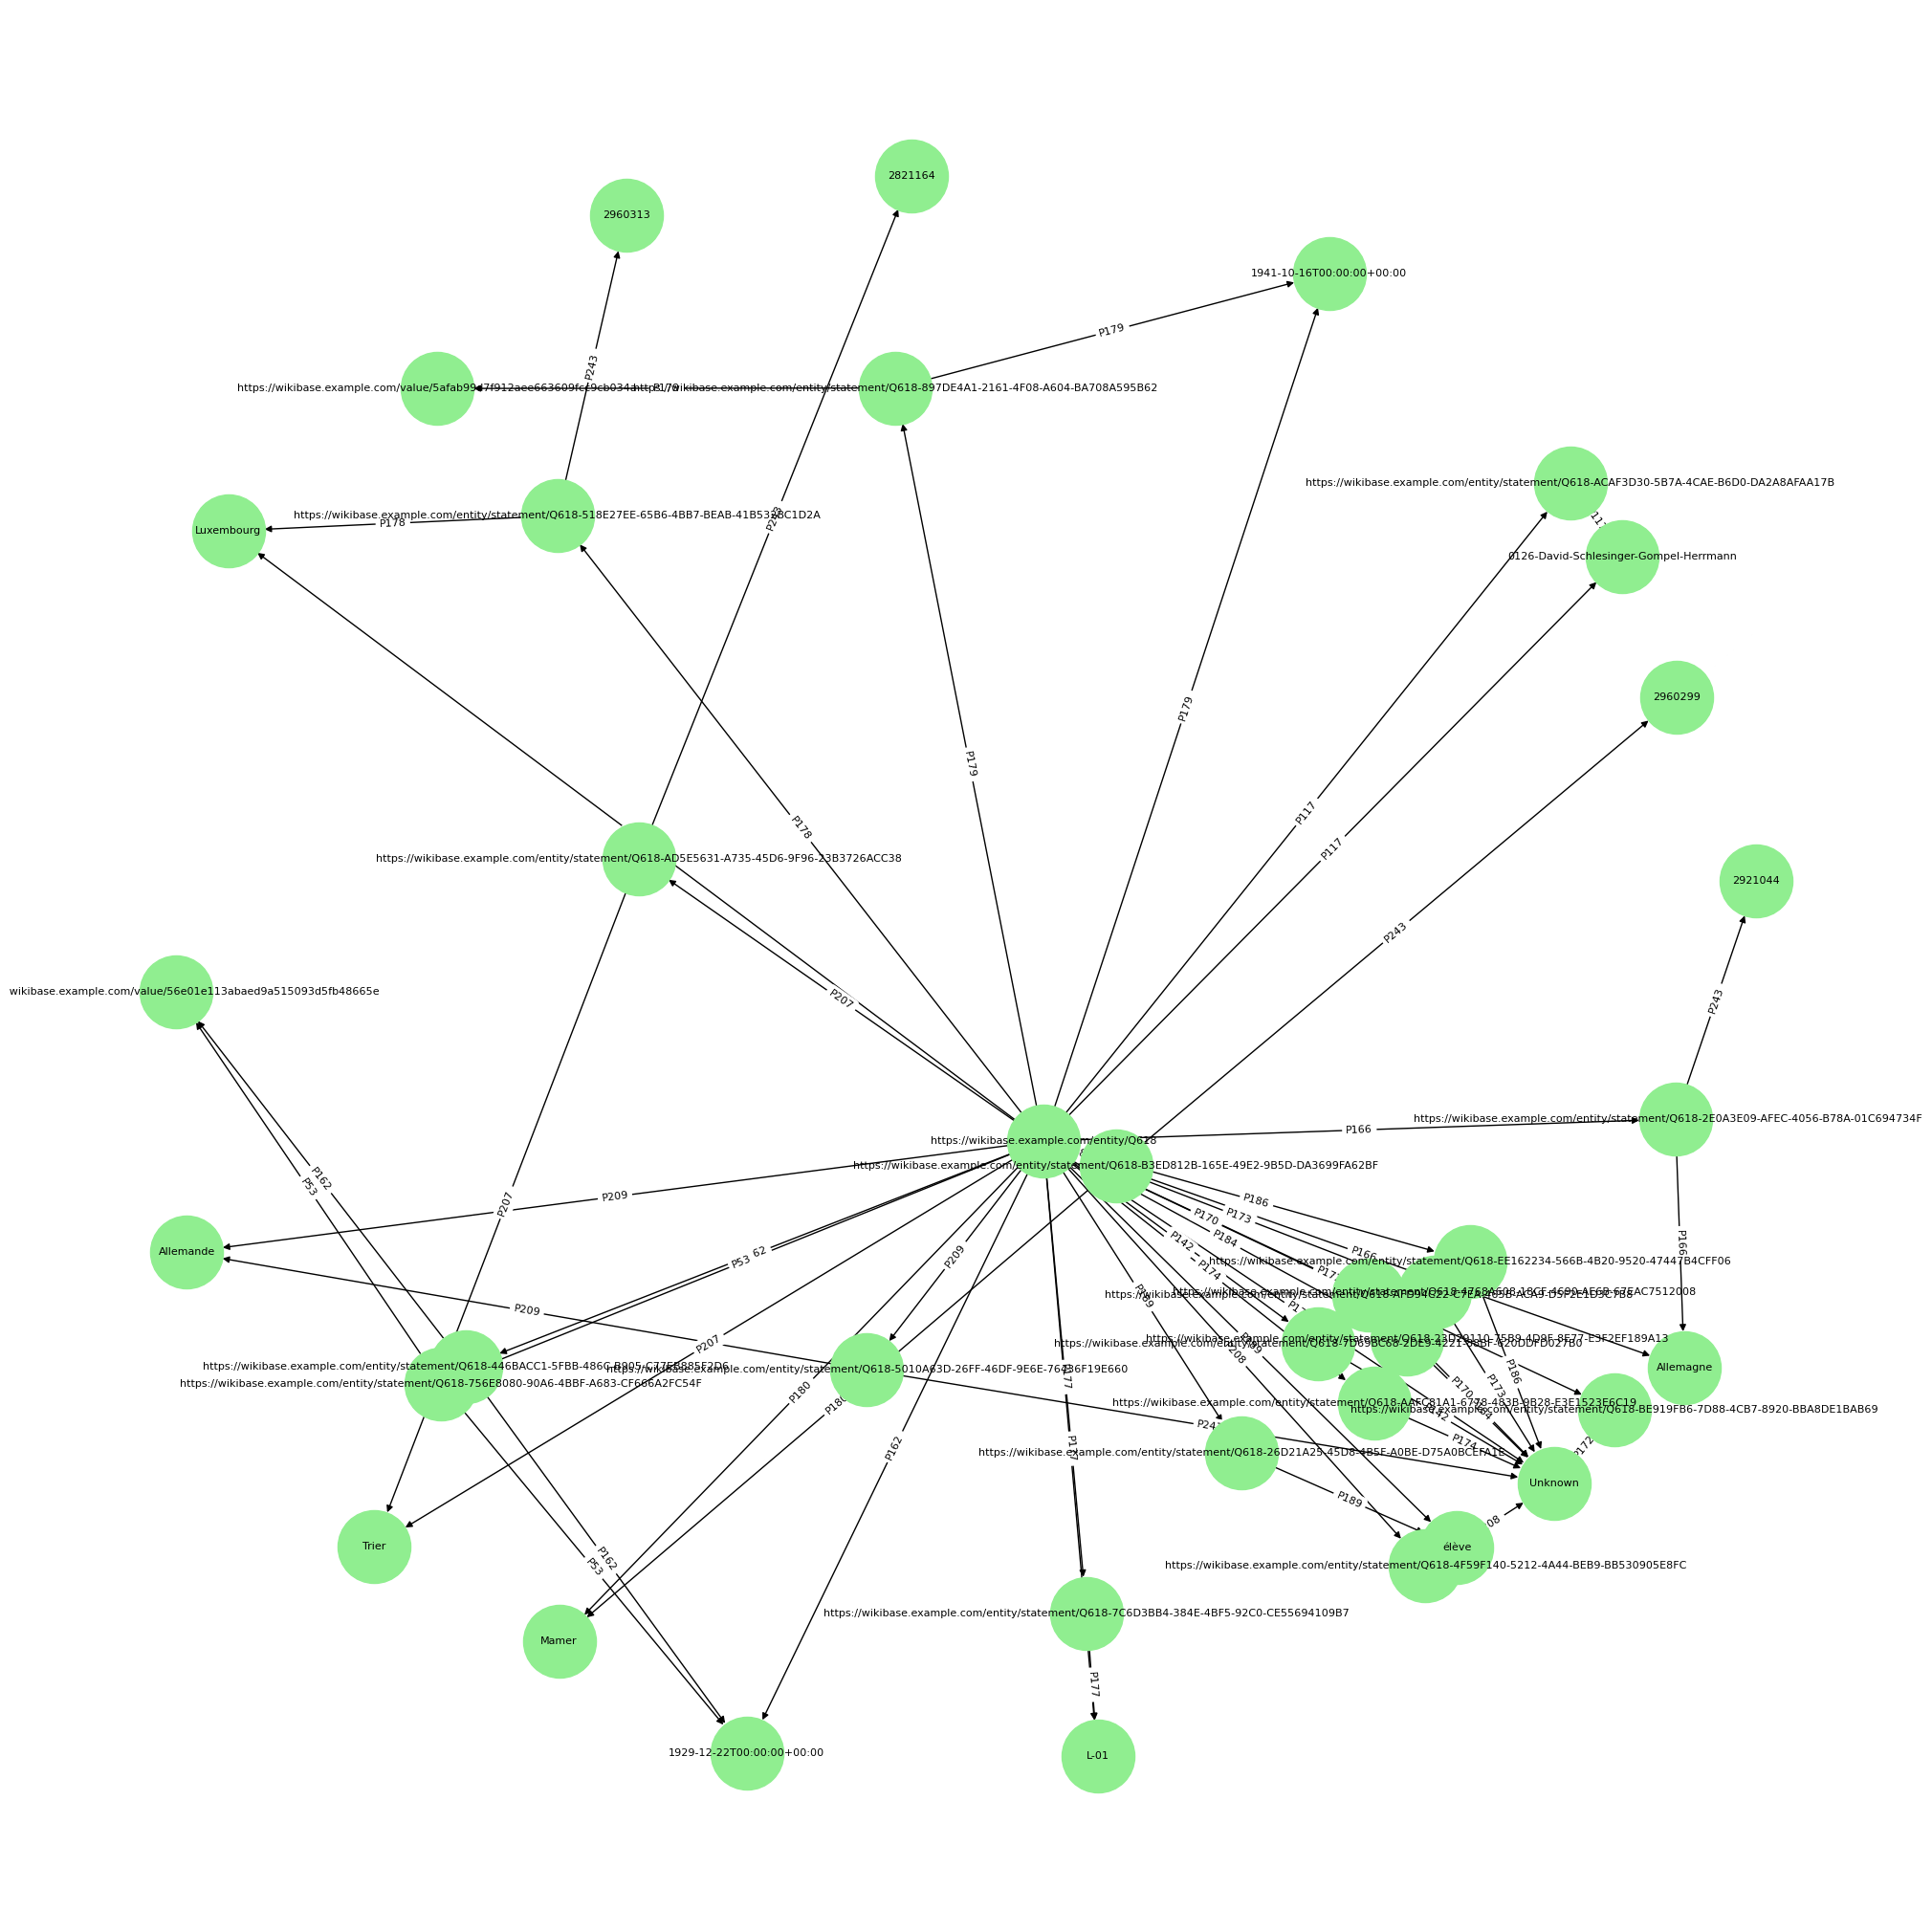

In [4]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt


sanitized_rdf_file_path = "/Users/ismail.ahouari/Downloads/Q618_sanitized.rdf"

# Load the sanitized RDF data into an rdflib Graph
g = rdflib.Graph()
g.parse(sanitized_rdf_file_path)

# Create a NetworkX DiGraph focusing only on subjects, predicates (properties), and objects
nx_graph = nx.DiGraph()

# Only include specific predicates or filter out nodes with too many connections
filtered_predicates = set([
    "P1",   # instanceof
    "P2",   # sex or gender
    "P3",   # date of birth
    "P4",   # image
    "P39",  # Instance of
    "P40",  # Sex or gender
    "P41",  # Date of birth
    "P42",  # Image
    "P51",  # First Name
    "P52",  # Last Name
    "P53",  # Birth Date
    "P54",  # Birth Place
    "P55",  # Nationality
    "P56",  # Profession
    "P57",  # Death Date
    "P58",  # Death Place
    "P70",  # place of birth
    "P71",  # country of citizenship
    "P72",  # occupation
    "P73",  # date of death
    "P74",  # place of death
    "P115", # Type of entity
    "P116", # Households
    "P117", # Household Organization
    "P121", # Last Name Notes
    "P142", # Last Name Changed
    "P144", # Date of Birth
    "P162", # Original Birth Date
    "P163", # Birth Date Notes
    "P165", # Alternative Birth Place
    "P166", # Birth Country
    "P167", # Alternative Birth Country
    "P169", # Original Death Date
    "P170", # Death Date Notes
    "P172", # Alternative Death Place
    "P173", # Death Country
    "P174", # Alternative Death Country
    "P176", # Nationality Notes
    "P177", # Convoy
    "P178", # Convoy Place
    "P179", # Convoy Date
    "P180", # Enter Place
    "P181", # Enter Date
    "P182", # Exit Before 1941-10-15 Place
    "P183", # Exit Before 1941-10-15 Date
    "P184", # Exit Between 1940-05-10 and 1941-10-15 Place
    "P185", # Exit Between 1940-05-10 and 1941-10-15 Date
    "P186", # Exit Between 1941-10-16 and 1944-09-10 Place
    "P187", # Exit Between 1941-10-16 and 1944-09-10 Date
    "P188", # Address Before 1940-05-10
    "P189", # Professions
    "P207", # Birth Place (Text)
    "P208", # Death Place (Text)
    "P209", # Nationality (Text)
    "P212", # Instance of.
    "P224", # Instance Of
    "P243"  # GeoNames ID
])  

for subj, pred, obj in g:
    pred_str = str(pred).split('/')[-1]  # Simplify the predicate URI
    if pred_str in filtered_predicates:  # Filter by predicate
        subj_str = str(subj)
        obj_str = str(obj)
        nx_graph.add_edge(subj_str, obj_str, label=pred_str)

# Increase node spacing by adjusting the 'k' parameter in the spring layout
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(nx_graph, k=0.5, iterations=100)  # Increase k for more spacing
nx.draw(nx_graph, pos, with_labels=False, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_labels(nx_graph, pos, font_size=8)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)}, font_size=8)

plt.show()

/var/folders/dx/g0s4_jk5207c7y_0l5gx0y95qnw34j/T/ipykernel_98549/3474345503.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(nx_graph, pos, with_labels=False, node_size=3000, node_color=colors, cmap=plt.cm.get_cmap('Set3'), font_size=10, font_weight="bold", arrows=True)


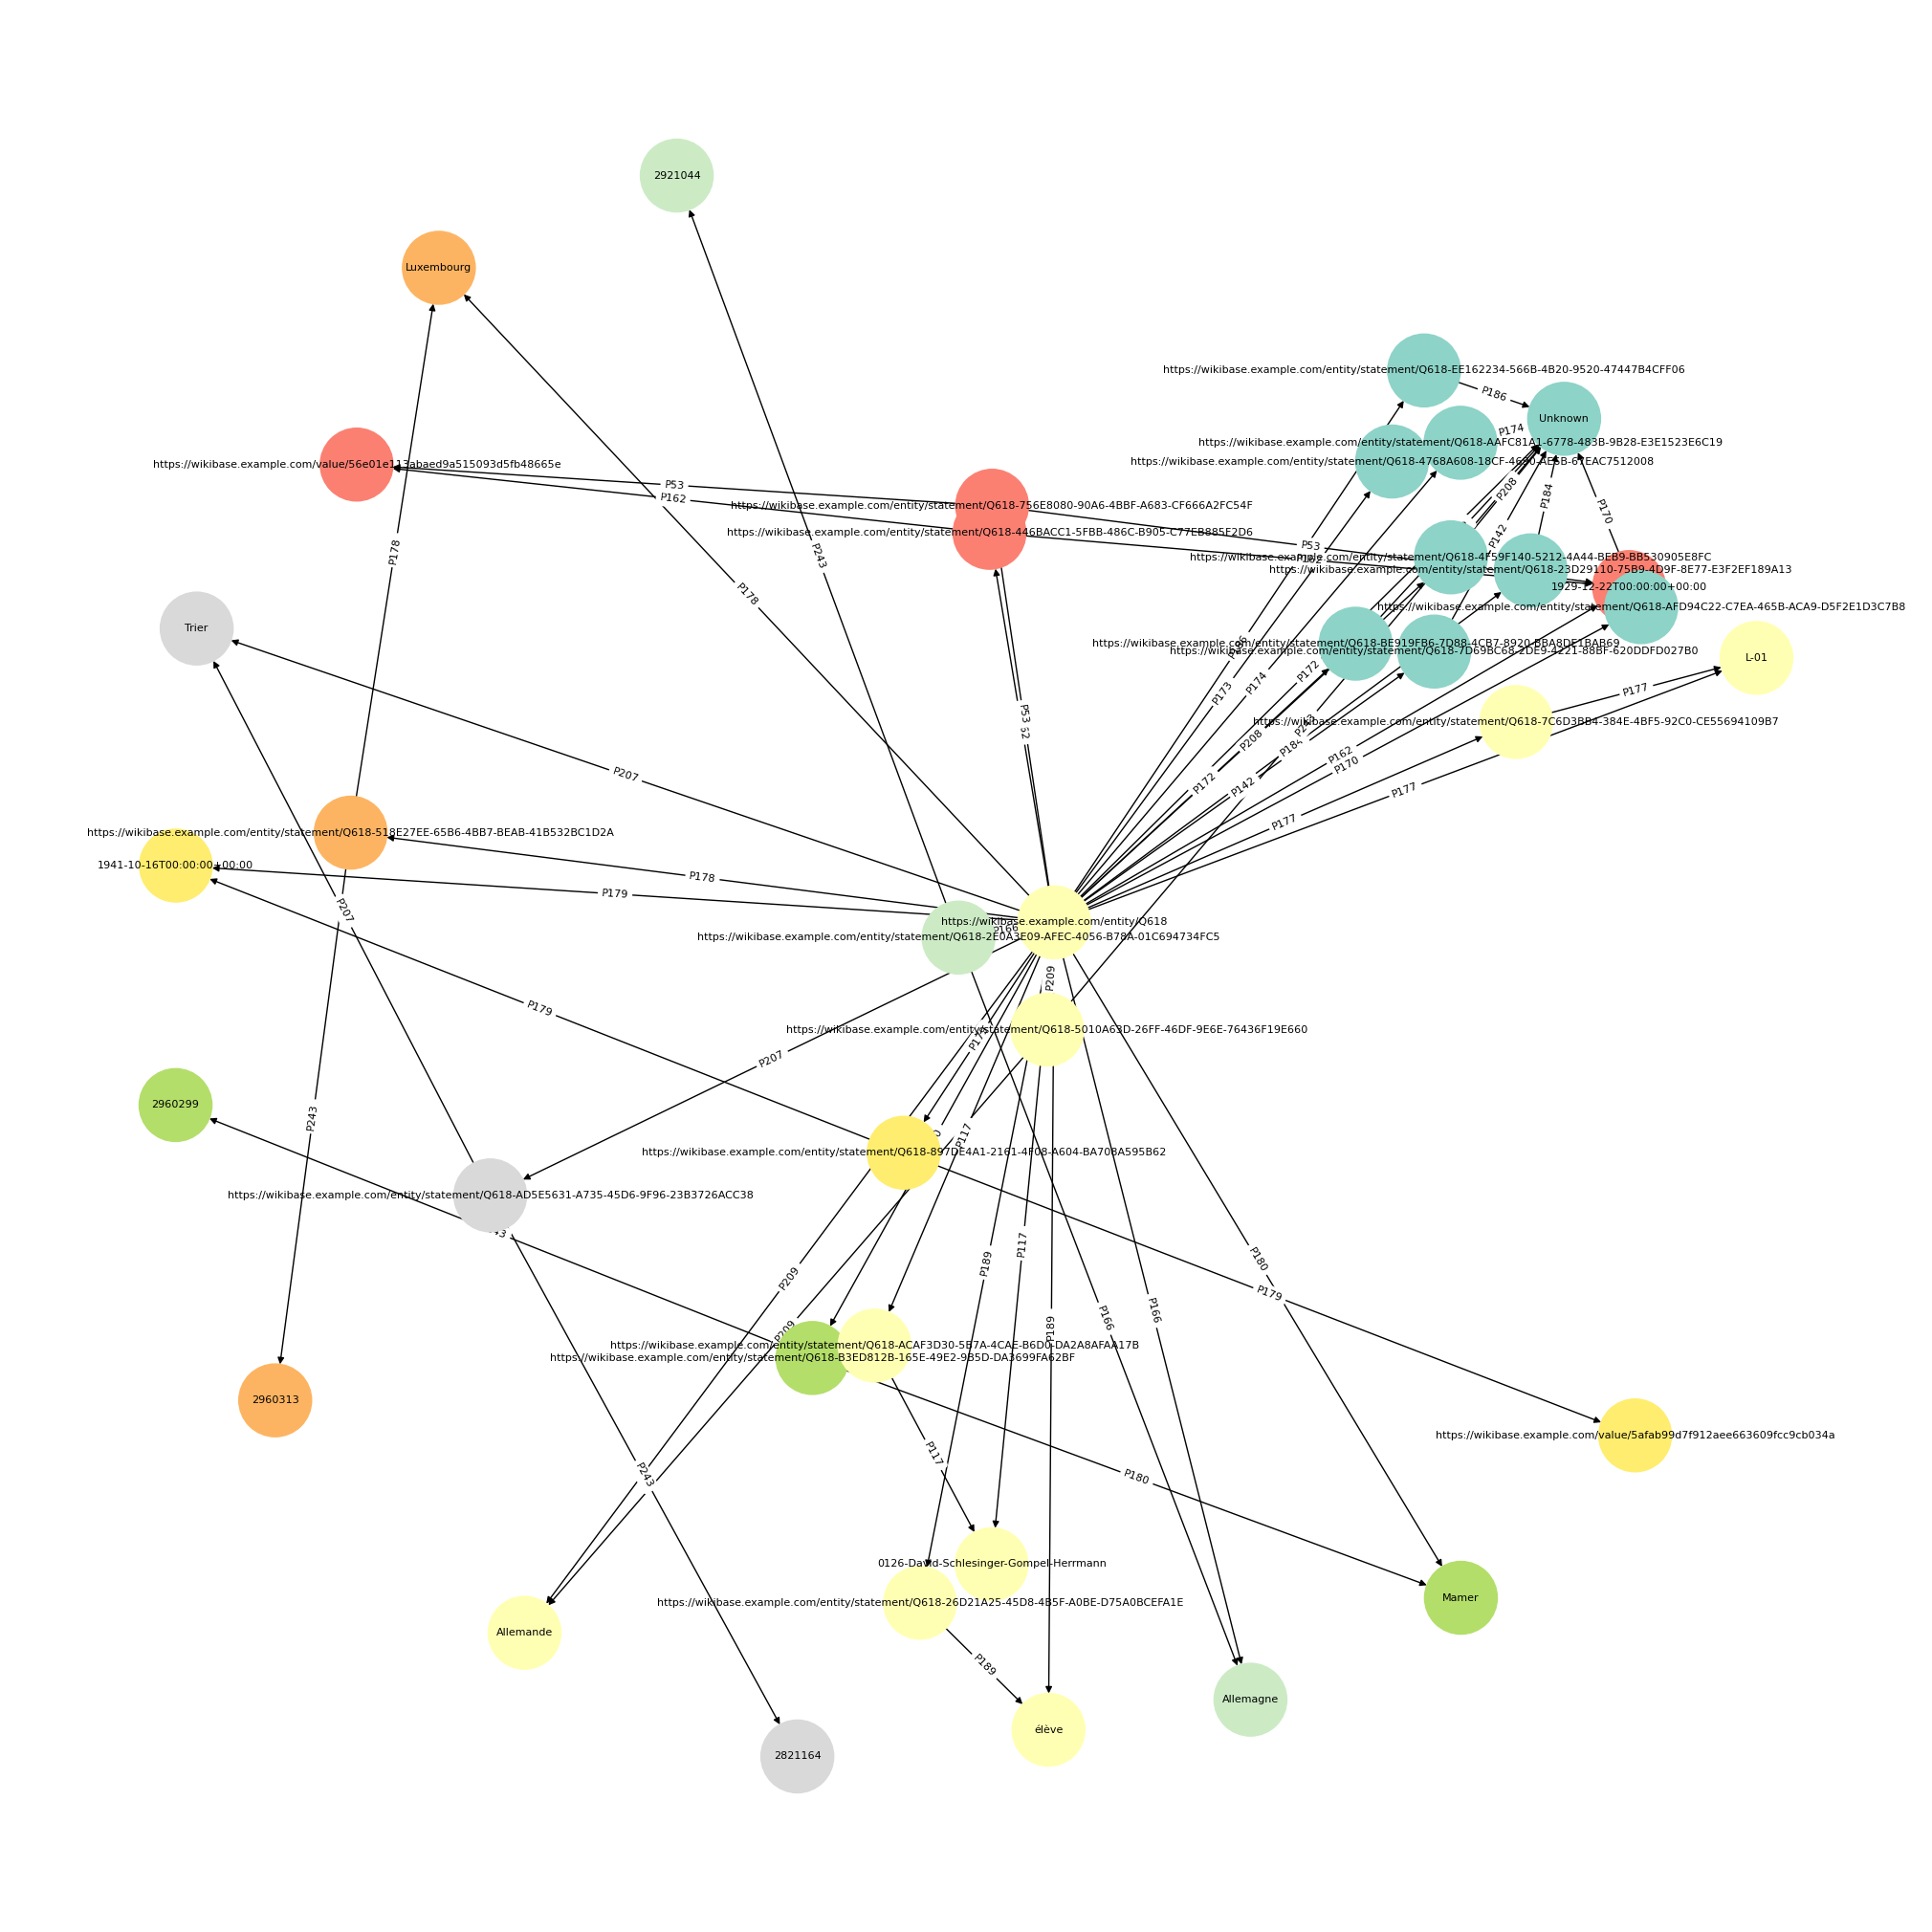

In [5]:
sanitized_rdf_file_path = "/Users/ismail.ahouari/Downloads/Q618_sanitized.rdf"


import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Load the sanitized RDF data into an rdflib Graph
g = rdflib.Graph()
g.parse(sanitized_rdf_file_path)

# Create a NetworkX DiGraph focusing only on subjects, predicates (properties), and objects
nx_graph = nx.DiGraph()

# Only include specific predicates or filter out nodes with too many connections
filtered_predicates = set([
    "P1",   # instanceof
    "P2",   # sex or gender
    "P3",   # date of birth
    "P4",   # image
    "P39",  # Instance of
    "P40",  # Sex or gender
    "P41",  # Date of birth
    "P42",  # Image
    "P51",  # First Name
    "P52",  # Last Name
    "P53",  # Birth Date
    "P54",  # Birth Place
    "P55",  # Nationality
    "P56",  # Profession
    "P57",  # Death Date
    "P58",  # Death Place
    "P70",  # place of birth
    "P71",  # country of citizenship
    "P72",  # occupation
    "P73",  # date of death
    "P74",  # place of death
    "P115", # Type of entity
    "P116", # Households
    "P117", # Household Organization
    "P121", # Last Name Notes
    "P142", # Last Name Changed
    "P144", # Date of Birth
    "P162", # Original Birth Date
    "P163", # Birth Date Notes
    "P165", # Alternative Birth Place
    "P166", # Birth Country
    "P167", # Alternative Birth Country
    "P169", # Original Death Date
    "P170", # Death Date Notes
    "P172", # Alternative Death Place
    "P173", # Death Country
    "P174", # Alternative Death Country
    "P176", # Nationality Notes
    "P177", # Convoy
    "P178", # Convoy Place
    "P179", # Convoy Date
    "P180", # Enter Place
    "P181", # Enter Date
    "P182", # Exit Before 1941-10-15 Place
    "P183", # Exit Before 1941-10-15 Date
    "P184", # Exit Between 1940-05-10 and 1941-10-15 Place
    "P185", # Exit Between 1940-05-10 and 1941-10-15 Date
    "P186", # Exit Between 1941-10-16 and 1944-09-10 Place
    "P187", # Exit Between 1941-10-16 and 1944-09-10 Date
    "P188", # Address Before 1940-05-10
    "P189", # Professions
    "P207", # Birth Place (Text)
    "P208", # Death Place (Text)
    "P209", # Nationality (Text)
    "P212", # Instance of.
    "P224", # Instance Of
    "P243"  # GeoNames ID
])  

for subj, pred, obj in g:
    pred_str = str(pred).split('/')[-1]  # Simplify the predicate URI
    if pred_str in filtered_predicates:  # Filter by predicate
        subj_str = str(subj)
        obj_str = str(obj)
        nx_graph.add_edge(subj_str, obj_str, label=pred_str)

# Detect communities (clusters of related nodes)
communities = community.greedy_modularity_communities(nx_graph)

# Create a mapping from node to community index
community_mapping = {}
for i, community in enumerate(communities):
    for node in community:
        community_mapping[node] = i

# Assign colors to each community
colors = [community_mapping[node] for node in nx_graph.nodes()]

# Increase node spacing by adjusting the 'k' parameter in the spring layout
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(nx_graph, k=0.5, iterations=100, seed=42)  # Increase k for more spacing and consistent layout
nx.draw(nx_graph, pos, with_labels=False, node_size=3000, node_color=colors, cmap=plt.cm.get_cmap('Set3'), font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_labels(nx_graph, pos, font_size=8)
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in nx_graph.edges(data=True)}, font_size=8)

plt.show()

In [6]:
import re

def sanitize_rdf_node_id(rdf_content):
    # Regex pattern to find invalid rdf:nodeID
    pattern = re.compile(r'rdf:nodeID="(\d[^"]*)"')
    sanitized_content = re.sub(pattern, lambda x: f'rdf:nodeID="_{x.group(1)}"', rdf_content)
    return sanitized_content

# Read the RDF file
rdf_file_path = "/Users/ismail.ahouari/Downloads/Q617.rdf"
with open(rdf_file_path, 'r') as file:
    rdf_content = file.read()

# Sanitize the content
sanitized_rdf_content = sanitize_rdf_node_id(rdf_content)

# Write the sanitized content back to a new file
sanitized_rdf_file_path = "/Users/ismail.ahouari/Downloads/Q617_sanitized.rdf"
with open(sanitized_rdf_file_path, 'w') as file:
    file.write(sanitized_rdf_content)

print("Sanitization complete. Saved the sanitized RDF file.")

Sanitization complete. Saved the sanitized RDF file.


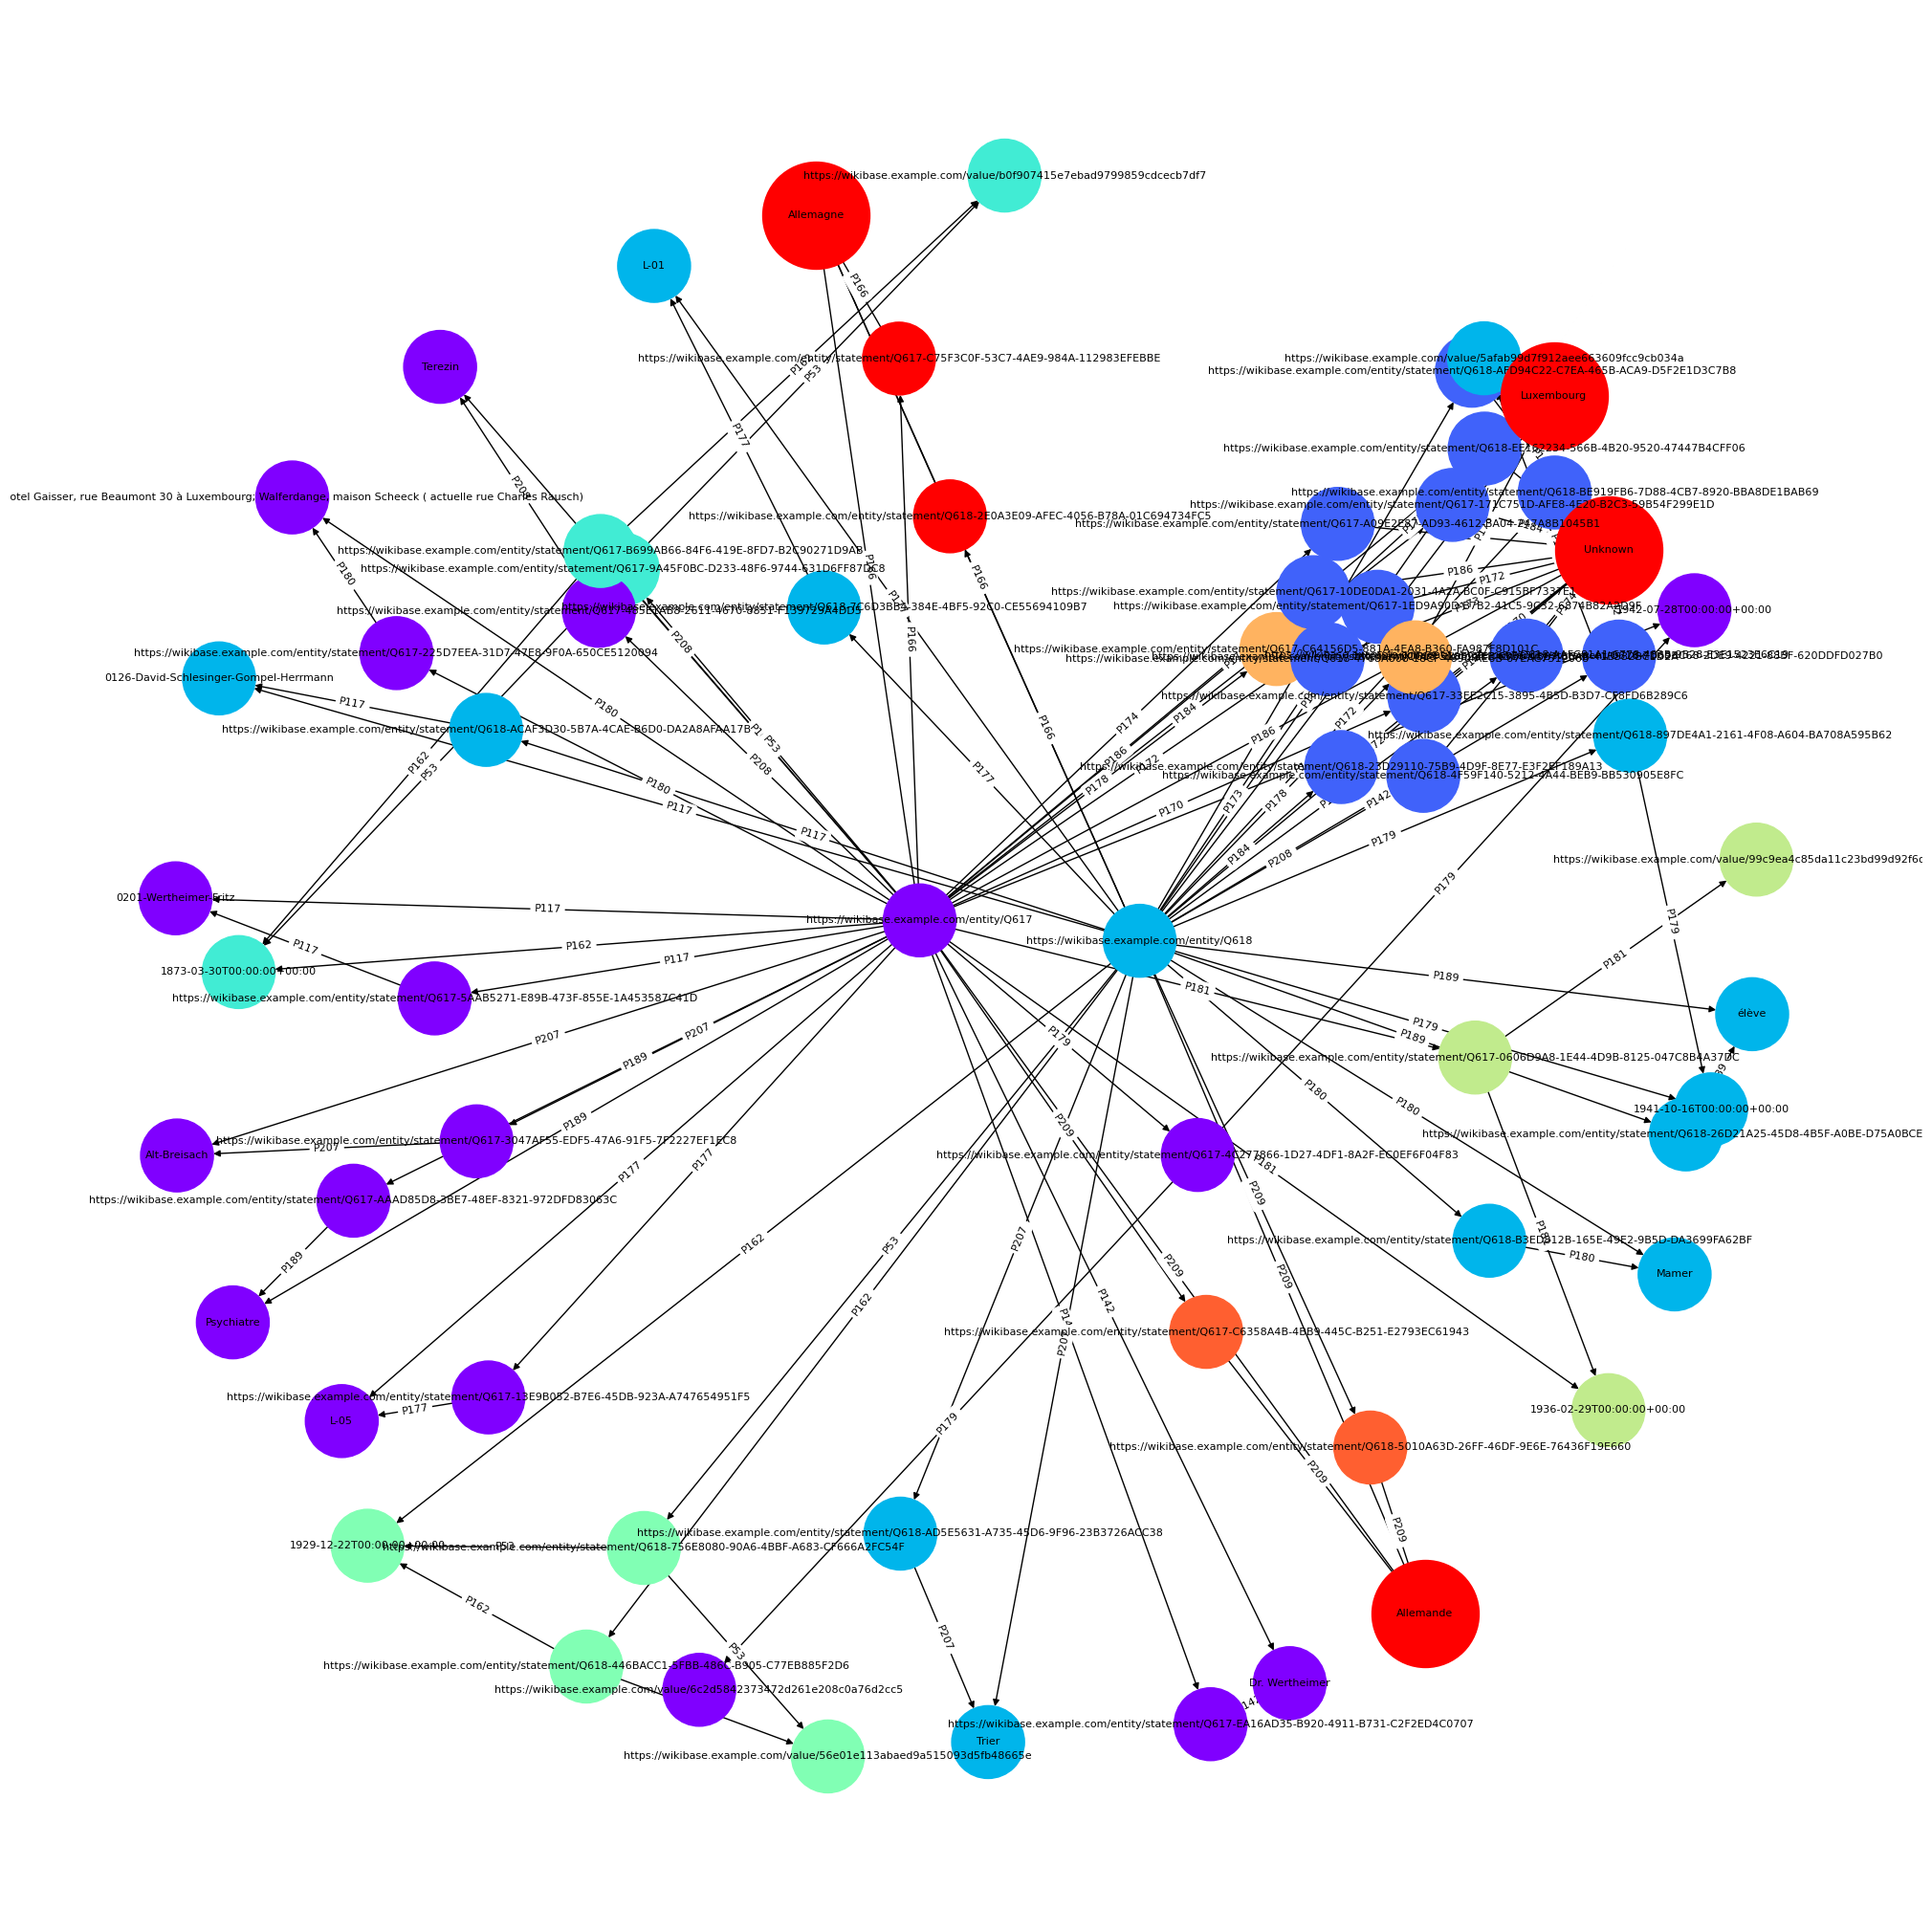

In [18]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Load the sanitized RDF data into an rdflib Graph for both entities
sanitized_rdf_file_path1 = "/Users/ismail.ahouari/Downloads/Q617_sanitized.rdf"
sanitized_rdf_file_path2 = "/Users/ismail.ahouari/Downloads/Q618_sanitized.rdf"

g1 = rdflib.Graph()
g1.parse(sanitized_rdf_file_path1)

g2 = rdflib.Graph()
g2.parse(sanitized_rdf_file_path2)

# Create NetworkX DiGraphs for both entities
entity1_graph = nx.DiGraph()
entity2_graph = nx.DiGraph()

# Define the filtered predicates
filtered_predicates = set([
    "P1",   # instanceof
    "P2",   # sex or gender
    "P3",   # date of birth
    "P4",   # image
    "P39",  # Instance of
    "P40",  # Sex or gender
    "P41",  # Date of birth
    "P42",  # Image
    "P51",  # First Name
    "P52",  # Last Name
    "P53",  # Birth Date
    "P54",  # Birth Place
    "P55",  # Nationality
    "P56",  # Profession
    "P57",  # Death Date
    "P58",  # Death Place
    "P70",  # place of birth
    "P71",  # country of citizenship
    "P72",  # occupation
    "P73",  # date of death
    "P74",  # place of death
    "P115", # Type of entity
    "P116", # Households
    "P117", # Household Organization
    "P121", # Last Name Notes
    "P142", # Last Name Changed
    "P144", # Date of Birth
    "P162", # Original Birth Date
    "P163", # Birth Date Notes
    "P165", # Alternative Birth Place
    "P166", # Birth Country
    "P167", # Alternative Birth Country
    "P169", # Original Death Date
    "P170", # Death Date Notes
    "P172", # Alternative Death Place
    "P173", # Death Country
    "P174", # Alternative Death Country
    "P176", # Nationality Notes
    "P177", # Convoy
    "P178", # Convoy Place
    "P179", # Convoy Date
    "P180", # Enter Place
    "P181", # Enter Date
    "P182", # Exit Before 1941-10-15 Place
    "P183", # Exit Before 1941-10-15 Date
    "P184", # Exit Between 1940-05-10 and 1941-10-15 Place
    "P185", # Exit Between 1940-05-10 and 1941-10-15 Date
    "P186", # Exit Between 1941-10-16 and 1944-09-10 Place
    "P187", # Exit Between 1941-10-16 and 1944-09-10 Date
    "P188", # Address Before 1940-05-10
    "P189", # Professions
    "P207", # Birth Place (Text)
    "P208", # Death Place (Text)
    "P209", # Nationality (Text)
    "P212", # Instance of.
    "P224", # Instance Of
])

# Add triples to the respective graphs if they match the filtered predicates
for subj, pred, obj in g1:
    pred_str = str(pred).split('/')[-1]
    if pred_str in filtered_predicates:
        entity1_graph.add_edge(str(subj), str(obj), label=pred_str)

for subj, pred, obj in g2:
    pred_str = str(pred).split('/')[-1]
    if pred_str in filtered_predicates:
        entity2_graph.add_edge(str(subj), str(obj), label=pred_str)

# Find intersection nodes (common nodes)
intersection_nodes = set(entity1_graph.nodes()).intersection(set(entity2_graph.nodes()))

# Combine the graphs
combined_graph = nx.compose(entity1_graph, entity2_graph)

# Apply community detection to cluster similar nodes
communities = community.greedy_modularity_communities(combined_graph)

# Assign a color to each community
community_colors = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_colors[node] = i

# Visualization
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(combined_graph, k=0.5, iterations=100, seed=42)

# Draw each node with the color based on its community
colors = [community_colors[node] for node in combined_graph.nodes()]
nx.draw(combined_graph, pos, with_labels=False, node_size=3000, node_color=colors, cmap=plt.cm.rainbow, font_size=10, font_weight="normal", arrows=True)

# Highlight intersection nodes (common nodes)
nx.draw_networkx_nodes(combined_graph, pos, nodelist=intersection_nodes, node_color="red", node_size=6500)

# Draw labels and edges
nx.draw_networkx_labels(combined_graph, pos, font_size=8)
nx.draw_networkx_edge_labels(combined_graph, pos, edge_labels={(u, v): d['label'] for u, v, d in combined_graph.edges(data=True)}, font_size=8)

plt.show()